https://www.kaggle.com/ronitf/heart-disease-uci

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('heart.csv')

In [4]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


_____________________________________________________________

**PREGUNTA**
1. En caso de aplicar un modelo lineal, ¿qué deberíamos emplear; una regresión lineal o logística?

In [5]:
target = df1['target']
X = df1.drop(['target'],axis = 1)

Estandarizamos

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

*Aplica un método lineal*

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score



In [10]:
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_scaled, target, train_size=0.7)

In [26]:
'''RELLENAR MODELO LINEAL'''
modelo = LogisticRegression()
modelo.fit(X = X_train_logistic, y = y_train_logistic)

LogisticRegression()

In [27]:
y_pred_logistic = modelo.predict(X_test_logistic)

In [30]:
'''RELLENAR CONOCER EL INTERCEPT, LOS COEFICIENTES Y LA ACCURACY'''
print("Intercept:", modelo.intercept_)
print('Coeficiente:', modelo.coef_[0])
print('Coeficiente de determinación: %.2f' % r2_score(y_test_logistic, y_pred_logistic))

Intercept: [0.31465844]
Coeficiente: [ 0.09896546 -1.04005991  0.82451028 -0.47427575 -0.33082124  0.00346405
  0.38841814  0.71369758 -0.33996448 -0.31298082  0.55206283 -0.72801619
 -0.46959668]
Coeficiente de determinación: 0.30


**PREGUNTA**
2. ¿Cuál es el coeficiente para la variable 'exang'?
3. ¿Que accuracy obtenemos?

In [31]:
'''RELLENAR PARA SABER LA PROBABILIDAD A LA QUE PERTENECE CADA MUESTRA A UNA CLASE'''
predicciones = modelo.predict_proba(X = X_test_logistic)
predicciones = pd.DataFrame(predicciones, columns = modelo.classes_)
predicciones.head(5)

,0,1
0,0.707230,0.292770
1,0.149959,0.850041
2,0.901970,0.098030
3,0.125485,0.874515
4,0.926951,0.073049


**PREGUNTA**
4. ¿Qué % tiene la segunda muestra (fila 3) para la clase 0?

*Aplica SVM*

In [33]:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_scaled, target, train_size=0.7)

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

'''RELLENAR SVC Y ACCURACY'''
clf = SVC(kernel='linear')
clf.fit(X_train_SVM,y_train_SVM)
y_pred_SVM = clf.predict(X_test_SVM)
print(accuracy_score(y_test_SVM,y_pred_SVM))

0.9120879120879121


**PREGUNTA**
5. ¿Qué accuracy obtenemos mediante SVM?

*Decision Tree*

In [35]:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_scaled, target, train_size=0.7)

In [ ]:
! pip install graphviz

In [36]:
from sklearn import tree
import graphviz 

In [37]:
clf = tree.DecisionTreeClassifier(random_state=0)
#Entrenamos
'''RELLENAR'''
clf = clf.fit(X_train_DT, y_train_DT)

In [ ]:
y_pred_DT = clf.predict(X_test_DT)

In [38]:
'''RELLENAR ACCURACY'''
print("Accuracy:", modelo.score(X_test_DT, y_test_DT))

Accuracy: 0.8681318681318682


[Text(0.5, 0.875, 'x[2] <= -0.453\ngini = 0.497\nsamples = 212\nvalue = [98, 114]'),
 Text(0.25, 0.625, 'x[11] <= -0.225\ngini = 0.396\nsamples = 103\nvalue = [75, 28]'),
 Text(0.125, 0.375, 'x[12] <= 0.305\ngini = 0.499\nsamples = 44\nvalue = [21, 23]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'x[3] <= -1.292\ngini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'x[9] <= 1.26\ngini = 0.333\nsamples = 109\nvalue = [23, 86]'),
 Text(0.625, 0.375, 'x[4] <= 0.14\ngini = 0.28\nsamples = 101\nvalue = [17, 84]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'x[10] <= -1.462\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

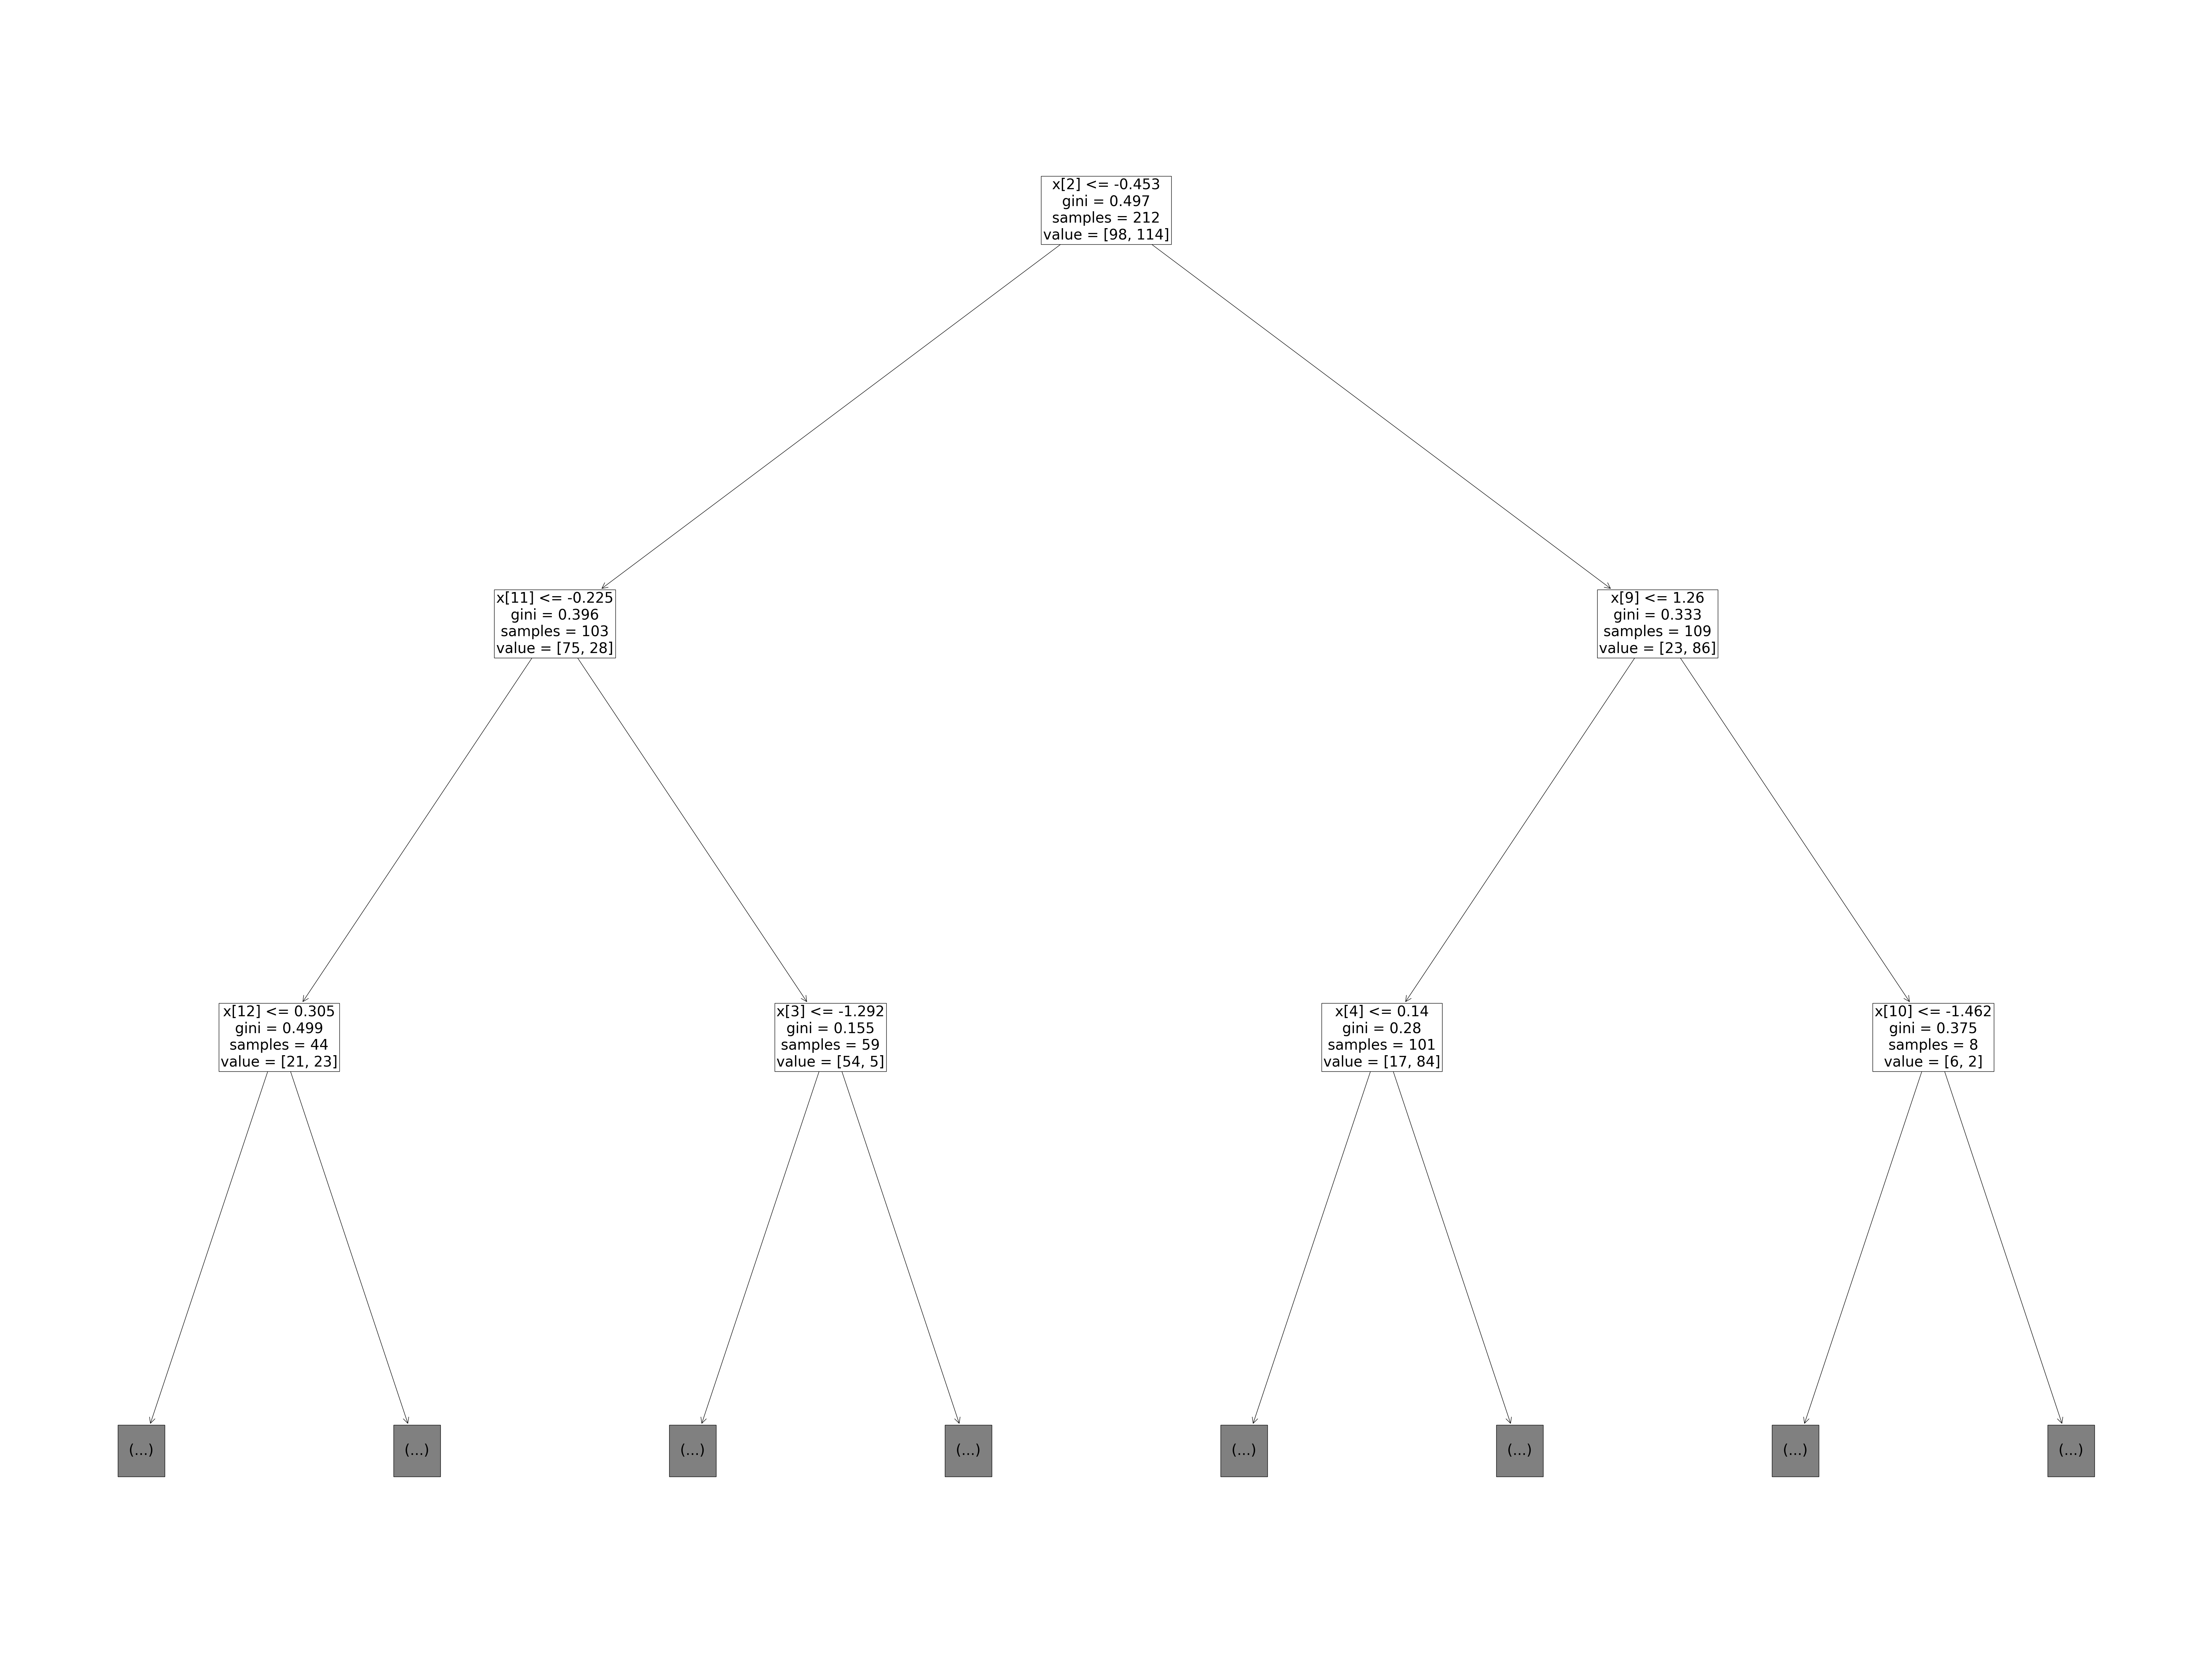

In [39]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,10,10])
tree.plot_tree(clf,fontsize=30,ax=ax,max_depth=2) 

**PREGUNTA**
6. Del segundo al tercer nivel, ¿mejora la métrica *gini* en todos los casos?

**PREGUNTA** Si lo que nos interesa es acertar bien los que tienen problemas de corazón, aunque detectemos algunos que no lo sean. (De esta manera evitamos que aquellos que si que tienen problemas no los perdamos) 
7. ¿Qué métrica debemos analizar? ¿Encontramos alguna diferencia entre el modelo que era mejor por accuracy que el modelo que es mejor en base a esta definición?
